# Time series forecasting

# Initial setup

## Import required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

Passengers
Month                 
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01       121.0
1949-06-01       135.0
1949-07-01       148.0
1949-08-01       148.0
1949-09-01       136.0
1949-10-01       119.0
1949-11-01       104.0
1949-12-01       118.0

# Time series analysis

## Plot time series data

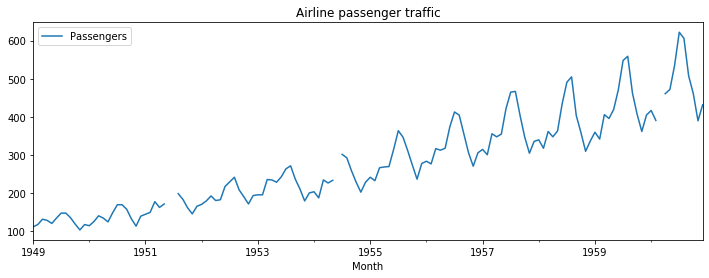

In [3]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

## Missing value treatment

### Mean imputation

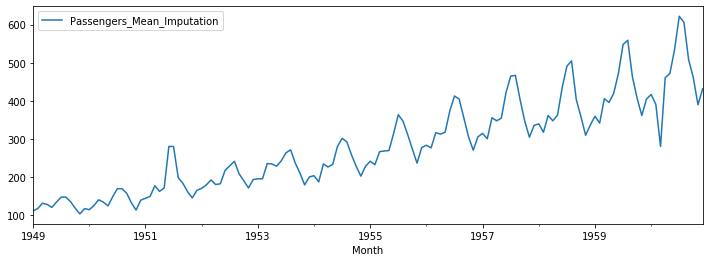

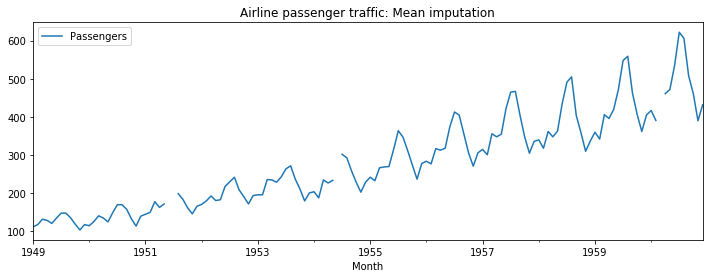

In [4]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
data[['Passengers']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

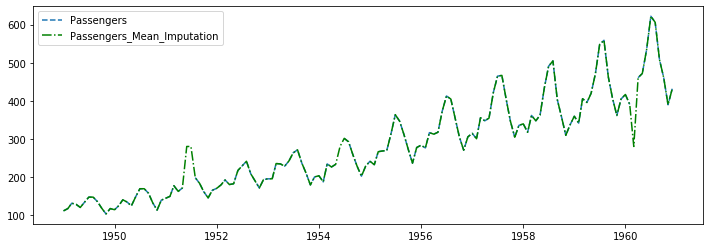

In [5]:
plt.figure(figsize= (12,4))
plt.plot(data.Passengers, label = "Passengers",linestyle="--")
plt.plot(data.Passengers_Mean_Imputation, label = 'Passengers_Mean_Imputation', color = 'green', linestyle="dashdot")
plt.legend(loc = 'best')
plt.show()

In [5]:
data

Passengers  Passengers_Mean_Imputation
Month                                             
1949-01-01       112.0                       112.0
1949-02-01       118.0                       118.0
1949-03-01       132.0                       132.0
1949-04-01       129.0                       129.0
1949-05-01       121.0                       121.0
...                ...                         ...
1960-08-01       606.0                       606.0
1960-09-01       508.0                       508.0
1960-10-01       461.0                       461.0
1960-11-01       390.0                       390.0
1960-12-01       432.0                       432.0

[144 rows x 2 columns]

### Linear interpolation

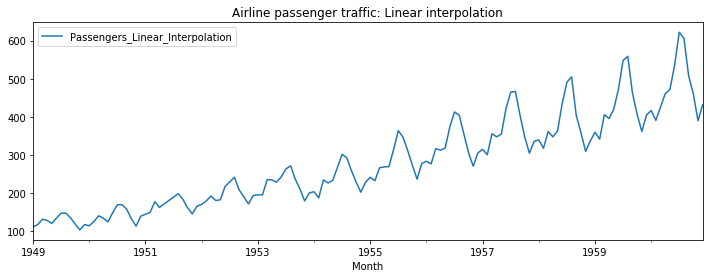

In [6]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [7]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

## Outlier detection

### Box plot and interquartile range

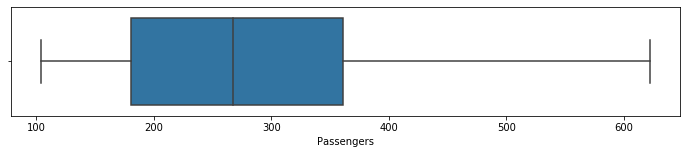

In [8]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

### Histogram plot

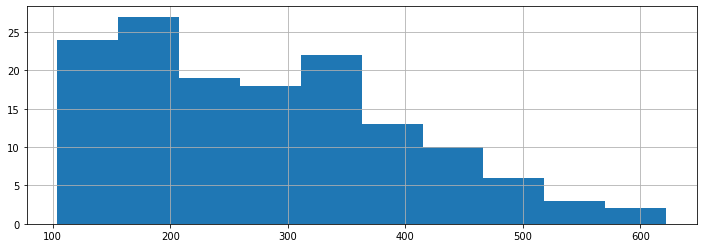

In [9]:
fig = data.Passengers.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

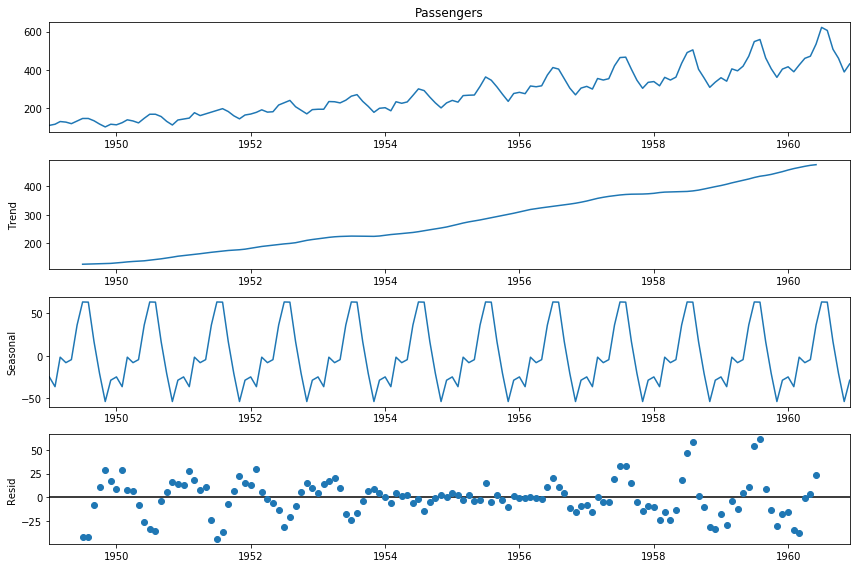

In [10]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

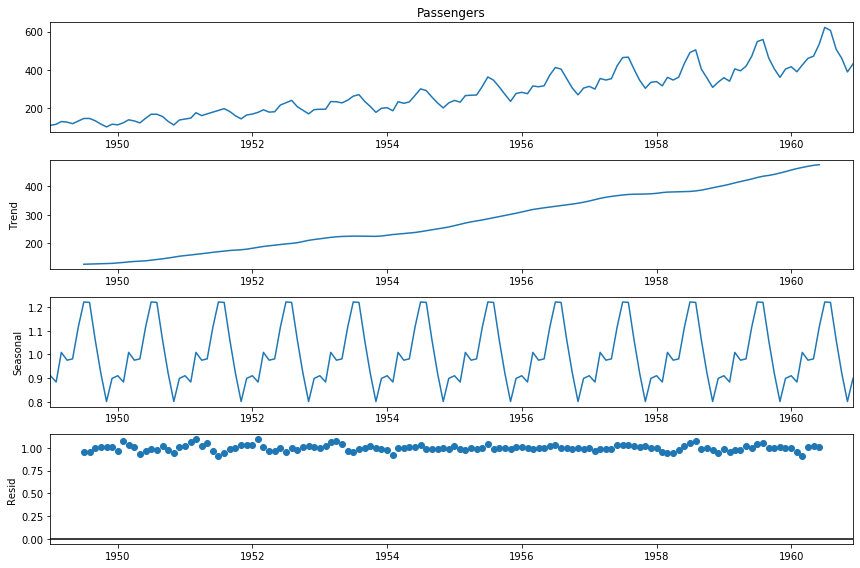

In [11]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [12]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

# Simple time series methods

## Naive method

In [13]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

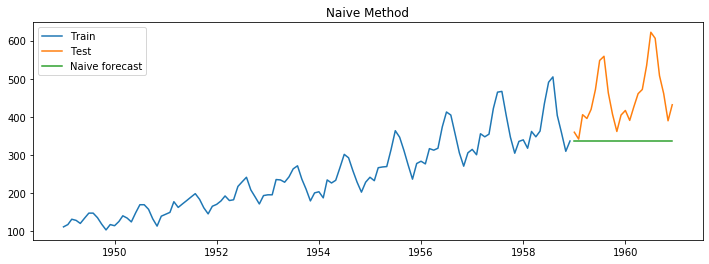

In [14]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [15]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0  Naive method  137.51  23.63

## Simple average method

In [16]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot train, test and forecast

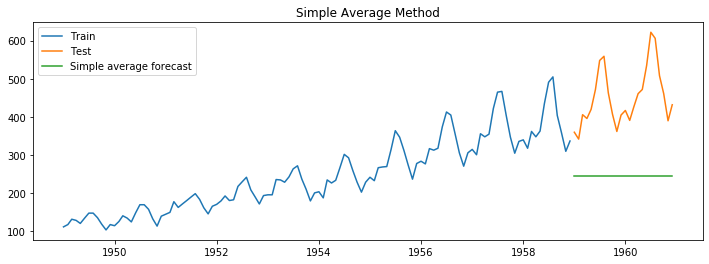

In [17]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [18]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0           Naive method  137.51  23.63
0  Simple average method  219.69  44.28

## Simple moving average method

In [19]:
y_hat_sma = data.copy()
ma_window = 2

data['Passengers'].rolling(ma_window).mean()

y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast']

y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [20]:
train_len

120

### Plot train, test and forecast

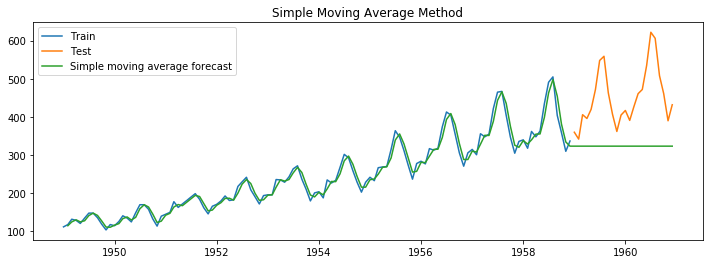

In [21]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [22]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                    Naive method  137.51  23.63
0           Simple average method  219.69  44.28
0  Simple moving average forecast  149.03  26.69

# Exponential smoothing methods

## Simple exponential smoothing

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [25]:
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [24]:
y_hat_ses

Passengers  ses_forecast
Month                               
1959-01-01       360.0    374.897327
1959-02-01       342.0    374.897327
1959-03-01       406.0    374.897327
1959-04-01       396.0    374.897327
1959-05-01       420.0    374.897327
1959-06-01       472.0    374.897327
1959-07-01       548.0    374.897327
1959-08-01       559.0    374.897327
1959-09-01       463.0    374.897327
1959-10-01       407.0    374.897327
1959-11-01       362.0    374.897327
1959-12-01       405.0    374.897327
1960-01-01       417.0    374.897327
1960-02-01       391.0    374.897327
1960-03-01       426.0    374.897327
1960-04-01       461.0    374.897327
1960-05-01       472.0    374.897327
1960-06-01       535.0    374.897327
1960-07-01       622.0    374.897327
1960-08-01       606.0    374.897327
1960-09-01       508.0    374.897327
1960-10-01       461.0    374.897327
1960-11-01       390.0    374.897327
1960-12-01       432.0    374.897327

### Plot train, test and forecast

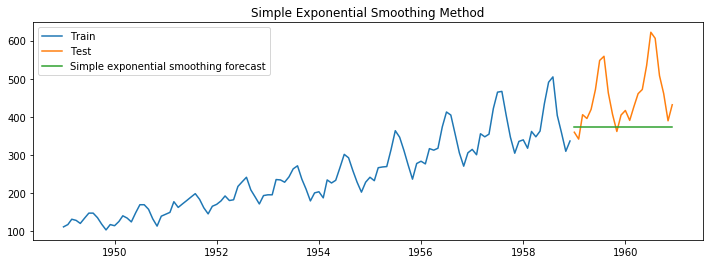

In [26]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [27]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

Method    RMSE   MAPE
0                           Naive method  137.51  23.63
0                  Simple average method  219.69  44.28
0         Simple moving average forecast  149.03  26.69
0  Simple exponential smoothing forecast  107.65  16.49

## Holt's method with trend

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

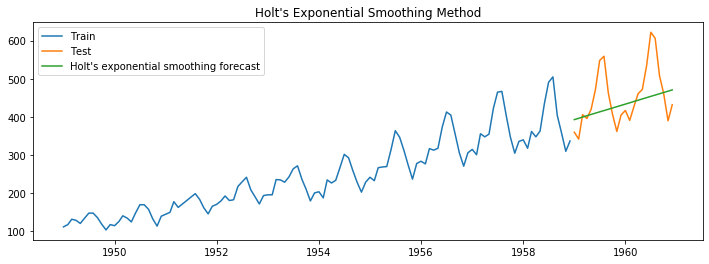

In [30]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [31]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                           Naive method  137.51  23.63
0                  Simple average method  219.69  44.28
0         Simple moving average forecast  149.03  26.69
0  Simple exponential smoothing forecast  107.65  16.49
0    Holt's exponential smoothing method   71.94  11.11

## Holt Winters' additive method with trend and seasonality

In [32]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2631578931410015, 'smoothing_slope': 0.05162966025765116, 'smoothing_seasonal': 0.7368421036673173, 'damping_slope': nan, 'initial_level': 211.55099866332293, 'initial_slope': 1.7391915752033313, 'initial_seasons': array([-100.18118437,  -94.2046477 ,  -80.29175565,  -83.41758365,
        -91.45908078,  -77.4509434 ,  -64.48324357,  -64.57340564,
        -76.66644176,  -93.73584142, -108.67610965,  -94.50947707]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

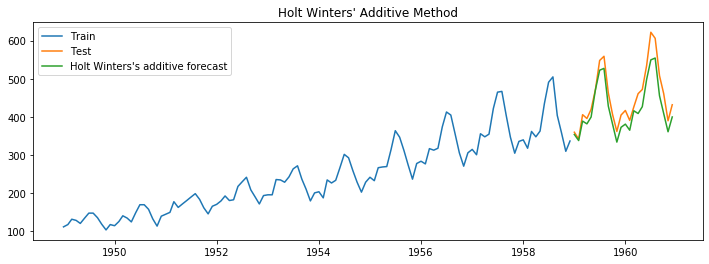

In [33]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [34]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                           Naive method  137.51  23.63
0                  Simple average method  219.69  44.28
0         Simple moving average forecast  149.03  26.69
0  Simple exponential smoothing forecast  107.65  16.49
0    Holt's exponential smoothing method   71.94  11.11
0          Holt Winters' additive method   35.10   6.53

## Holt Winter's multiplicative method with trend and seasonality

In [35]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.38297792357726124, 'smoothing_slope': 0.035502695358352605, 'smoothing_seasonal': 0.6170220681283785, 'damping_slope': nan, 'initial_level': 212.3983506469908, 'initial_slope': 1.095376632423797, 'initial_seasons': array([0.51702061, 0.5454338 , 0.60215765, 0.56916567, 0.51982655,
       0.57235007, 0.62776238, 0.62555286, 0.57005795, 0.49511555,
       0.43967716, 0.51387414]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

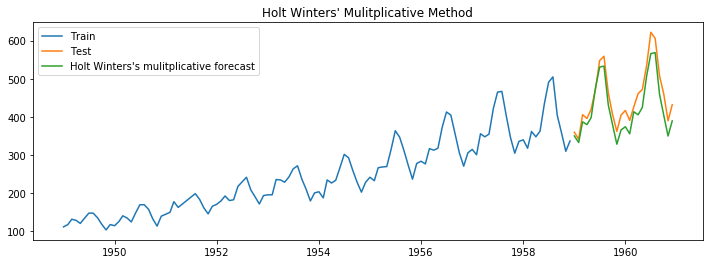

In [36]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [37]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method    RMSE   MAPE
0                           Naive method  137.51  23.63
0                  Simple average method  219.69  44.28
0         Simple moving average forecast  149.03  26.69
0  Simple exponential smoothing forecast  107.65  16.49
0    Holt's exponential smoothing method   71.94  11.11
0          Holt Winters' additive method   35.10   6.53
0    Holt Winters' multiplicative method   34.87   6.92

In [43]:
y_hat_hwmm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwmm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.38297792357726124, 'smoothing_slope': 0.035502695358352605, 'smoothing_seasonal': 0.6170220681283785, 'damping_slope': nan, 'initial_level': 212.3983506469908, 'initial_slope': 1.095376632423797, 'initial_seasons': array([0.51702061, 0.5454338 , 0.60215765, 0.56916567, 0.51982655,
       0.57235007, 0.62776238, 0.62555286, 0.57005795, 0.49511555,
       0.43967716, 0.51387414]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [44]:
y_hat_hwmm

Passengers  hw_forecast
Month                              
1959-01-01       360.0   350.266346
1959-02-01       342.0   333.003496
1959-03-01       406.0   387.245837
1959-04-01       396.0   379.916769
1959-05-01       420.0   398.020858
1959-06-01       472.0   475.820487
1959-07-01       548.0   530.699142
1959-08-01       559.0   533.264727
1959-09-01       463.0   431.240611
1959-10-01       407.0   380.279786
1959-11-01       362.0   328.603060
1959-12-01       405.0   365.979862
1960-01-01       417.0   374.425295
1960-02-01       391.0   355.840512
1960-03-01       426.0   413.651826
1960-04-01       461.0   405.676616
1960-05-01       472.0   424.856601
1960-06-01       535.0   507.722468
1960-07-01       622.0   566.082837
1960-08-01       606.0   568.623023
1960-09-01       508.0   459.677040
1960-10-01       461.0   405.218766
1960-11-01       390.0   350.035918
1960-12-01       432.0   389.721546

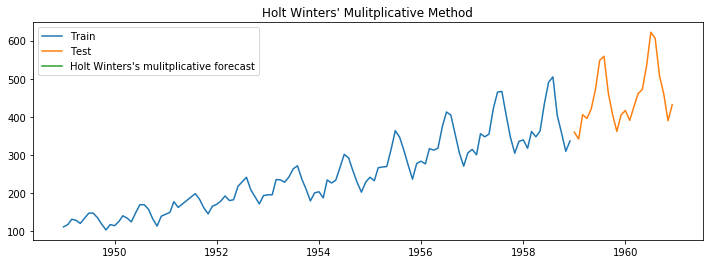

In [39]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwmm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [40]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwmm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwmm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method m'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').